In [14]:
import numpy as np
import matplotlib.pyplot as plt



In [15]:

def vandermore(X, K):
    N=X.shape[0]
    phi=np.zeros((N,K))
    for j in range(K):
        phi[:,j]=X**j
    return phi

create dataset X_test

Text(0.5, 1.0, 'Datapoints')

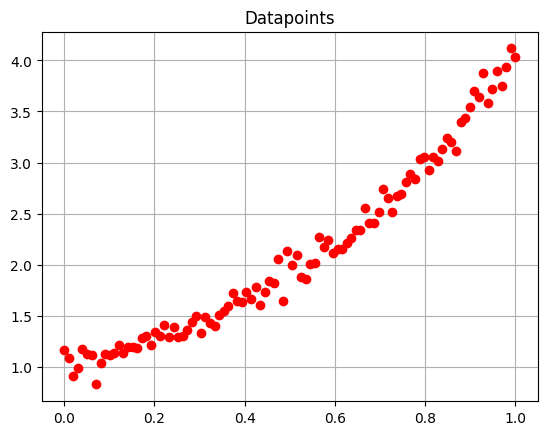

In [32]:
#create test problem
N=100 #n. of datapoints
K=4

a=0
b=1
#define true solution
theta_true=np.ones((K,))
X=np.linspace(a,b,N) #100 values equispaced from 0 to 1
#define Y such that theta_true is the solution of
#Phi(X)*theta=Y
phi=vandermore(X, K)
Y = phi @ theta_true 

#corrupt Y with noise (standard normal distribution with sigma=0.1)
sigma=0.1
Y=Y+sigma*np.random.normal(0,1,Y.shape)

#plot X against Y with red dots
plt.plot(X,Y, "o", color="red")
plt.grid()
plt.title("Datapoints")


# MLE
$\theta_{true}$ MLE using normal equations

(100, 4)


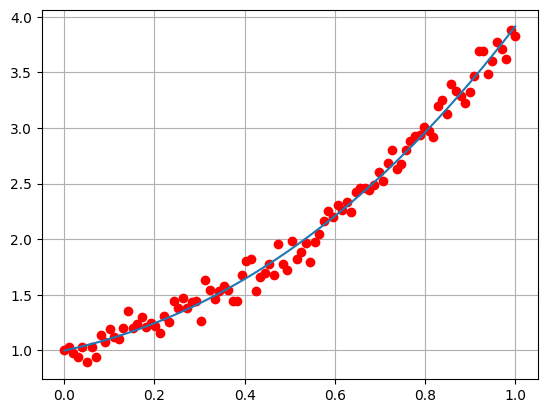

In [17]:
#given x and y compute a solution theta_mle
#print(np.linalg.inv(phi.T@phi)@phi.T@Y) #not efficient
theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y) #using LU factiorization, more efficient
#the best is using cholesky 
#plot f_theta(X)
XX=np.linspace(a,b,1000)
YY=vandermore(XX,K)@theta_mle
plt.plot(X,Y, "ro")
print(phi.shape)
#f_theta=phi@theta_mle
plt.plot(XX,YY)
plt.grid()



In [18]:
#test error funciton with mean squared error
def test_Error(theta, phi, Y):
    result=np.linalg.norm(phi@theta-Y)**2
    N=Y.shape[0]
    return result/N

In [19]:
#a function that takes (X,Y) and K and returns theta_mle
def fit_mle(D,K):#D=(X,Y)
    X,Y=D
    phi=vandermore(X,K)
    theta_mle= np.linalg.solve(phi.T@phi, phi.T@Y)
    return theta_mle

## different values of K

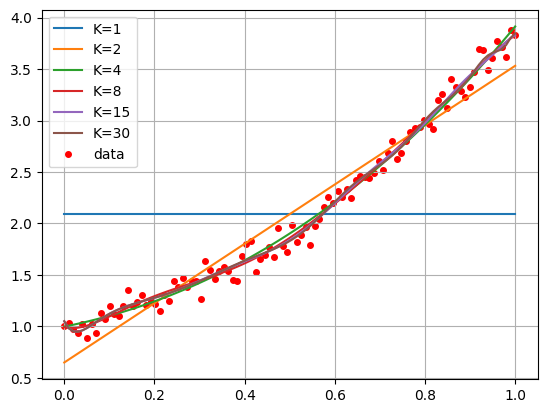

In [25]:
#we now want to UNDERFIT the model
#X and Y are fixed
#pretend to not know K -> we guess it
k_values=[1,2,4,8,15,30]
#solve MLE with difqferent K
for K_trial in k_values:
    phi_trial=vandermore(X, K_trial)
    theta_mle_t=np.linalg.solve(phi_trial.T@phi_trial, phi_trial.T@Y)
    plt.plot(X, phi_trial@theta_mle_t, label="K="+str(K_trial), zorder=2)

#plot new model as before with dataset
plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
plt.legend()
plt.grid()

Test and train error for different values of K

In [62]:
N_test=50
X_test=np.linspace(a,b,N_test)
#calculate Y_test as before, witj different K
test_error_mle=[]
train_error_mle=[]
for K_trial in k_values:
    theta_true=np.ones((K_trial,))
    Y_test=vandermore(X_test,K_trial)@theta_true
    Y_test=Y_test+sigma*np.random.normal(0,1,Y_test.shape)
    theta_train=fit_mle((X,Y), K_trial)
    theta_test=fit_mle((X_test,Y_test), K_trial)
    phi_test=vandermore(X_test, K_trial)
    phi_train=vandermore(X, K_trial)
    test_error_mle.append(test_Error(theta_test, phi_test, Y_test))
    train_error_mle.append(test_Error(theta_train, phi_train, Y))

    
    #train_error_mle.append(test_Error(theta_mle, phi, Y))
#plot test and train errors
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
plt.plot(k_values, train_error_mle, label="train error")
plt.plot(k_values, test_error_mle, label="test error")
plt.legend()
plt.subplot(2,1,2)
plt.plot(X, Y, "o", label="data", zorder=1)

#plt.plot(X_test, Y_test, "o", label="test data", zorder=1)
#plt.plot(X_train, phi_train@theta_train, label="train fit", zorder=2)
#plt.plot(X, phi_test@theta_test, label="test fit", zorder=2)
plt.legend()
plt.grid()
plt.xlabel("K")
plt.ylabel("error")



LinAlgError: Singular matrix

In [39]:
print((phi_train@theta_train).shape)
print((phi_test@theta_test).shape)

(100,)
(100,)


# MAP (maximum a posteriori) Estimation
function that takes (X,Y), K and lambda and returns the MAP estimate of theta

Text(0.5, 0.98, 'MAP for different K and lambda')

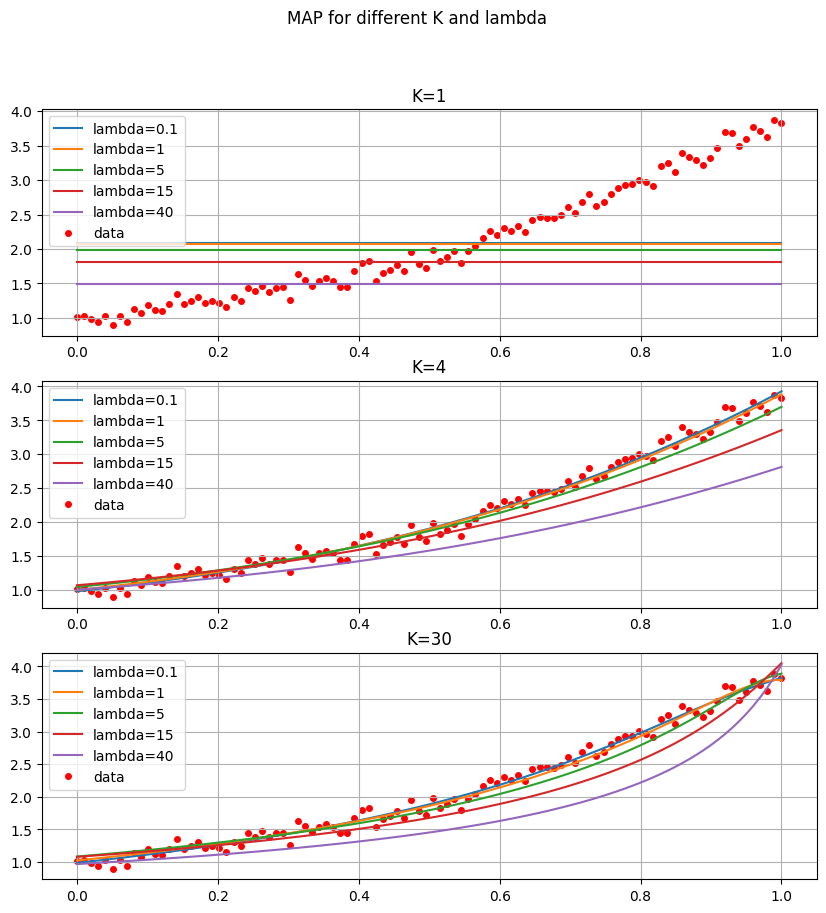

In [22]:
#for lambda too big we underfit, but underfitting is way easier to spot than overfit
def map_fit_mle(D, K, l):
    X,Y=D
    #compute vandermore
    phi=vandermore(X,K)
    #solve theta_map
    theta_map=np.linalg.solve(phi.T@phi+l*np.identity(K),phi.T@Y)
    return theta_map

l_val=[0.1,1,5,15,40]
k_val=[1,4,30]
#solve MAP with different lambda and k, for each k make a subplot
plt.figure(figsize=(10,10))
i=0
for K_trial in k_val:
    i+=1
    for l_trial in l_val:
        phi_trial=vandermore(X, K_trial)
        theta_map=map_fit_mle((X,Y), K_trial, l_trial)
        plt.subplot(3,1, i)
        plt.plot(X, phi_trial@theta_map, label="lambda="+str(l_trial))
    plt.plot(X,Y, "ro", markersize=4, label="data", zorder=1)
    plt.grid()
    plt.legend()
    plt.title("K="+str(K_trial))
plt.suptitle("MAP for different K and lambda")



#usially lambda is a default paraeter almost never changed


For K being <b>way greater</b> than the correct degree of the polynomial (>>4), compute the MLE and MAP<br>
solution. Compare the test error of the two, for different values of λ (in the case of MAP).

Text(0.5, 0.98, 'K=1000')

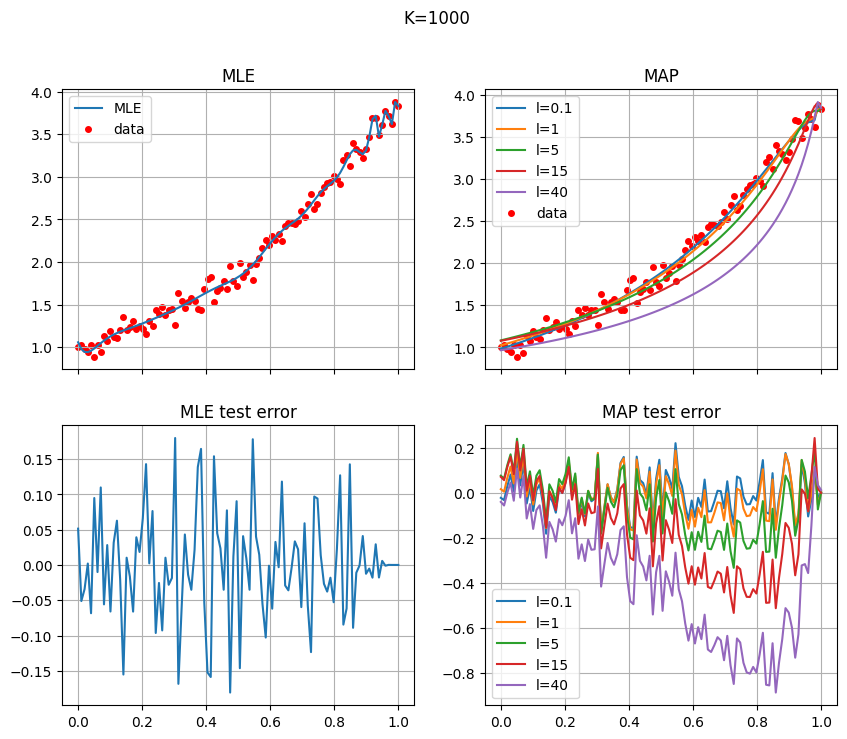

In [23]:
K=1000
phi=vandermore(X, K)
theta_MLE=fit_mle((X,Y), K)
mle_error=test_Error(theta_MLE, phi, Y)
fig, axes=plt.subplots(nrows=2,ncols=2, figsize=(10,8), sharex=True, sharey=False)
#axes[0,0].title("MLE")
axes[0,0].plot(X, phi@theta_MLE, label="MLE", zorder=2)
axes[0,0].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[0,0].legend()
axes[0,0].grid()
#axes[1,0].title("MLE error")
axes[1,0].plot(X, phi@theta_MLE-Y, label="MLE error")

for l in l_val:
    theta_map=map_fit_mle((X,Y), K, l)
    map_error=test_Error(theta_map, phi, Y)
    #axes[0,1].title("MAP")
    axes[0,1].plot(X, phi@theta_map, label="l="+str(l), zorder=2)
    #axes[0,1].title("MAP error")
    axes[1,1].plot(X, phi@theta_map-Y, label="l="+str(l))
axes[0,1].plot(X,Y, "ro", markersize=4, label="data", zorder=1)
axes[0,1].legend()
axes[0,1].grid()
axes[1,1].grid()
axes[1,1].legend()
axes[1,0].grid()
plt.subplot(2,2,1)
plt.title("MLE")
plt.subplot(2,2,2)
plt.title("MAP")
plt.subplot(2,2,3)
plt.title("MLE test error")
plt.subplot(2,2,4)
plt.title("MAP test error")
plt.suptitle("K="+str(K))



Define $Err(\theta)=\frac{||\theta-\theta_{true}||}{||\theta_{true}||}$, then compare Err($\theta_{MLE}$) and Err($\theta_{MAP}$) for different values of K and λ.

In [24]:
def err(theta, theta_true):
    if(theta_true.shape[0]<theta.shape[0]):
        theta_true=np.concatenate((theta_true, np.zeros(theta.shape[0]-theta_true.shape[0])))
    err=np.linalg.norm(theta-theta_true)
    err=err/np.linalg.norm(theta_true)
    return err
K=4
phi=vandermore(X, K)
theta_true_mle=fit_mle((X,Y), K)
theta_true_map=map_fit_mle((X,Y), K, 0)
k_val=[30,50,70]
l_val=[0,1,5,15,40]
for k in k_val:
    theta_mle=fit_mle((X,Y), k)
    print("k=", k)
    print(" MLE error=", err(theta_mle, theta_true_mle))
    print(" MAP error")
    for l in l_val:
        theta_map=map_fit_mle((X,Y), k, l)
        print(" l=",l,"->", err(theta_map, theta_true_map))
    
    print("")

k= 30
 MLE error= 1326218.2673963783
 MAP error
 l= 0 -> 1326218.2673963783
 l= 1 -> 0.49488453417759987
 l= 5 -> 0.5358281754089541
 l= 15 -> 0.5774555730139062
 l= 40 -> 0.6266374633162676

k= 50
 MLE error= 4612598.313315843
 MAP error
 l= 0 -> 4612598.313315843
 l= 1 -> 0.4960180121398592
 l= 5 -> 0.5360400183572256
 l= 15 -> 0.5794144712855066
 l= 40 -> 0.6263731068932376

k= 70
 MLE error= 33333614.1869186
 MAP error
 l= 0 -> 33333614.1869186
 l= 1 -> 0.4970245218963404
 l= 5 -> 0.5356896548799815
 l= 15 -> 0.579907431471027
 l= 40 -> 0.6265744163606516

